# Recognizing Digits with k-NN

The MNIST dataset is one of the most widely used datasets in ML classes and has been for years. It consists of 60,000 digitized scans of handwritten digits along with their classifications: 0-9. Sci-kit learn includes a clean subset of this data in its `datasets` package. In this notebook you will recognize digits using a k-NN classifier.

In [1]:
import numpy as np
from sklearn.datasets import load_digits
from matplotlib import pyplot as plt

The method to return the dataset is `load_digits()`. Call it in the next cell 

In [2]:
# call load_digits() and set the return value to a new variable `digits`
digits = load_digits()

Look at the data stored in `digits` and load the appropriate values into the variables `X` and `y`. $X$ should be an array of vectors, representing the flattened 8x8 image data and $y$ should be an array of labels 0-9.

In [3]:
### Store X and y here
print(type(digits))
print(digits.keys())
print(digits.images.shape)
print(digits.images[0])
print(digits.data[0])
print(digits.target)

<class 'sklearn.utils._bunch.Bunch'>
dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])
(1797, 8, 8)
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
[0 1 2 ... 8 9 8]


Looks like the images column are the x values, and the "data" column is the image flattened into a length 64 vector. The "target" column looks like the y values.

In [4]:
X = digits.data
y = digits.target

The following cells let you explore the dataset.

In [5]:
images = digits.images

data = [ 0.  0.  5. 12.  1.  0.  0.  0.  0.  0. 15. 14.  7.  0.  0.  0.  0.  0.
 13.  1. 12.  0.  0.  0.  0.  2. 10.  0. 14.  0.  0.  0.  0.  0.  2.  0.
 16.  1.  0.  0.  0.  0.  0.  6. 15.  0.  0.  0.  0.  0.  9. 16. 15.  9.
  8.  2.  0.  0.  3. 11.  8. 13. 12.  4.]
label = 2


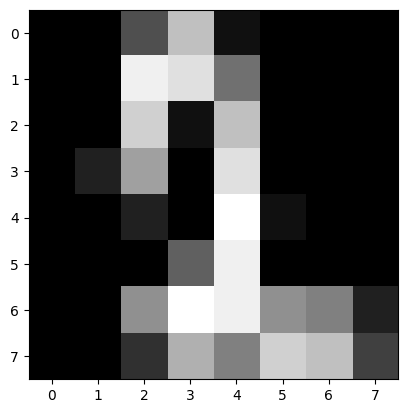

In [6]:
k = 12 # change this
plt.imshow(images[k], cmap='grey')
print(f"data = {X[k]}")
print(f"label = {y[k]}")

Determine the size and shape of your data. How many X and y observations are there? What are their datatypes? Is there any missing data?

In [7]:
## your code here
print(X.shape, y.shape)
print(np.isnan(X).sum())
print(np.isnan(y).sum())
print(type(X), type(y))
print(type(X[0]), type(y[0]))
print(type(X[0][0]))

(1797, 64) (1797,)
0
0
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
<class 'numpy.ndarray'> <class 'numpy.int64'>
<class 'numpy.float64'>


It looks like there are 1797 observations, and no missing data. There aren't any NaN values in the dataset, and both $X$ and $y$ are numpy arrays. $X$ is a 2d array of floats, and $y$ is a 1 dimensional array of integers between 0-9

Is the dataset balanced? Determine the frequency of each label

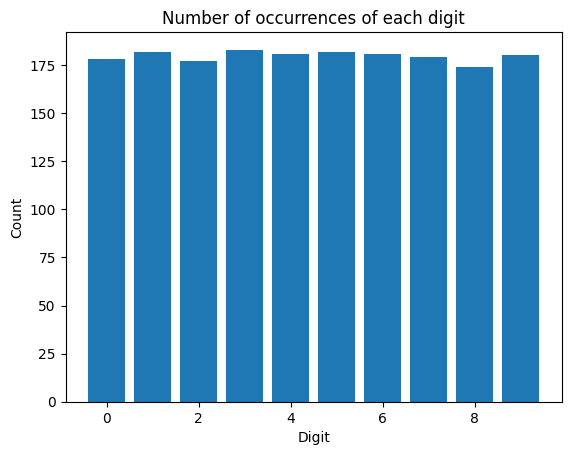

In [8]:
## your code here
occurences = np.bincount(y)
plt.bar(np.arange(10), occurences)
plt.title("Number of occurrences of each digit")
plt.xlabel("Digit")
plt.ylabel("Count")
plt.show()

It looks like the dataset is balanced, with each digit being present roughly 175 times in the dataset.

## Training k-NN

We will load the dataset below and some useful library functions. It is your job to make a train/test split and determine the accuracy of a k-NN classifier using scikit learn built in operations. You should

1. Correctly process the data and train a k-NN for k=1.
2. Print the accuracy on the test set
3. Plot a confusion matrix for the test set
4. Analyze the accuracy as $k$ increases. For each $k$ (over a range you determine useful), train a $k$-NN on 10 train/test splits and store the average accuracy. Plot this accuracy against k.
5. Which $k$ do you think is best?
6. Is "accuracy" a valid metric in this case? Does it obscure any critical shortcoming of our algorithm?

Refer to old notebooks for the functions you need. The basic outline for this is mostly the same for all scikit-learn algorithms.

In [9]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [10]:
# complete here
digits = load_digits()
X = digits.data
y = digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1437, 64) (360, 64) (1437,) (360,)


In [11]:
model = KNeighborsClassifier(n_neighbors=1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9777777777777777


[[33  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 34  0  0  0  0  0  0]
 [ 0  1  0  0 45  0  0  0  0  0]
 [ 0  0  0  0  0 46  1  0  0  0]
 [ 0  0  0  0  0  0 35  0  0  0]
 [ 0  0  0  0  0  0  0 33  0  1]
 [ 0  1  0  0  0  0  0  0 28  1]
 [ 0  0  0  1  1  1  0  0  0 37]]


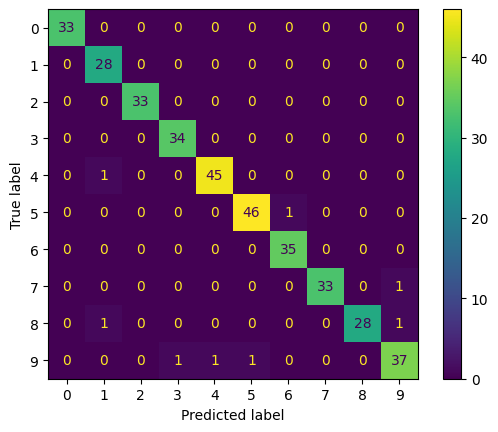

In [12]:
confusion = confusion_matrix(y_test, y_pred)
print(confusion)
ConfusionMatrixDisplay(confusion).plot(cmap='viridis')
plt.show()

It looks like the model is pretty accurate with k = 1, but plotting the different values would show a better picture.

In [13]:
digits = load_digits()
X = digits.data
y = digits.target

k_values = np.logspace(0, np.log(len(X_train)), 25, base=np.e).astype(int)
k_values = np.unique(k_values[:-1])
#theres no reason to use k = the whole dataset because it will always be wrong

accuracy = np.array([])
for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    thisacc = np.array([])
    for _ in range(10):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        thisacc = np.append(thisacc, accuracy_score(y_test, y_pred))
    accuracy = np.append(accuracy, np.mean(thisacc))
    print(f"k = {k}, accuracy = {accuracy[-1]}")
print(accuracy)

k = 1, accuracy = 0.9847222222222222
k = 2, accuracy = 0.9850000000000001
k = 3, accuracy = 0.9894444444444443
k = 4, accuracy = 0.9911111111111112
k = 6, accuracy = 0.9833333333333334
k = 8, accuracy = 0.981111111111111
k = 11, accuracy = 0.9791666666666666
k = 15, accuracy = 0.9738888888888887
k = 20, accuracy = 0.9644444444444444
k = 28, accuracy = 0.9636111111111111
k = 37, accuracy = 0.9622222222222223
k = 51, accuracy = 0.9411111111111111
k = 69, accuracy = 0.9316666666666666
k = 94, accuracy = 0.9247222222222223
k = 127, accuracy = 0.8958333333333334
k = 172, accuracy = 0.8941666666666668
k = 233, accuracy = 0.8702777777777777
k = 315, accuracy = 0.8419444444444444
k = 427, accuracy = 0.7777777777777779
k = 579, accuracy = 0.6772222222222222
k = 784, accuracy = 0.6202777777777777
k = 1061, accuracy = 0.3925
[0.98472222 0.985      0.98944444 0.99111111 0.98333333 0.98111111
 0.97916667 0.97388889 0.96444444 0.96361111 0.96222222 0.94111111
 0.93166667 0.92472222 0.89583333 0.8941

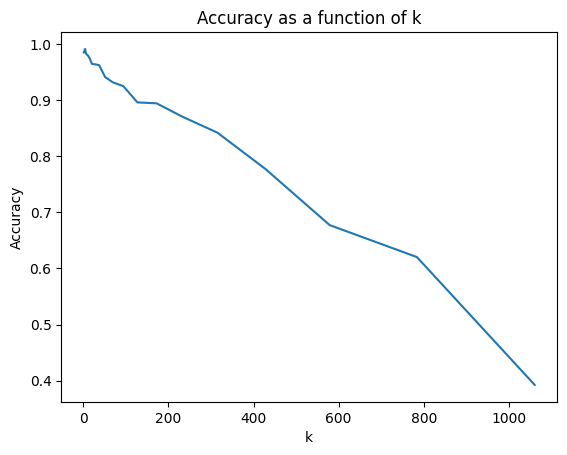

In [14]:
plt.title("Accuracy as a function of k")
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.plot(k_values, accuracy)
plt.show()

It looks like k = 4 is the best option, and the other k values perform with a worse accuracy. Accuracy feels like it would be an adequate metric because each of the labels are evenly distributed, so there's no way the model can "cheese" the accuracy by saying the same thing every time. The accuracy might obscure the fact that it's probably better to miss a number by 1 than it is to miss it by 3. (Mislabeling a 5 as a 4 is probably less detrimental than as a 0).

# Extension

Find the full 60,000 sample dataset online and try it with your preferred $k$-NN. This dataset exists in many places but some are cleaner and easier to use than others so be prepared to shop around. Print out

1. the accuracy
2. the time spent training
3. the time spent testing
4. a confusion matrix on the test set

In [15]:
from tensorflow.keras.datasets import mnist # type: ignore
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import time
import numpy as np
import matplotlib.pyplot as plt

2024-11-08 18:41:43.641678: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-08 18:41:43.646468: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-08 18:41:43.665592: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-08 18:41:43.690297: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1731109303.709678   57783 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1731109303.71

In [16]:
mnist

<module 'keras.api.datasets.mnist' from '/home/arush/ML/env/lib/python3.11/site-packages/keras/api/datasets/mnist/__init__.py'>

In [17]:
(X_image, y_train2), (X_image_test, y_test2) = mnist.load_data()

In [18]:
print(X_image[0])
print(y_train)
print(type(X_image[0][0][0]))

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

It looks like everything is stored as unsigned 8 bit numbers, and the images are larger. They are 28 by 28 instead of 8 by 8, and the X images aren't flattened.

In [19]:
X_train2 = X_image.reshape(60000, 784)
X_test2 = X_image_test.reshape(10000, 784)

In [24]:
tick = time.time()
model = KNeighborsClassifier(n_neighbors=4)
model.fit(X_train2, y_train2)
tock = time.time()
print(f"Training time: {tock - tick:.5f} seconds")

Training time: 0.00357 seconds


In [25]:
tick = time.time()
y_pred2 = model.predict(X_test2)
tock = time.time()
print(f"Testing time: {tock - tick:.3f} seconds")

Testing time: 13.950 seconds


In [22]:
accuracy = accuracy_score(y_test2, y_pred2)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9691


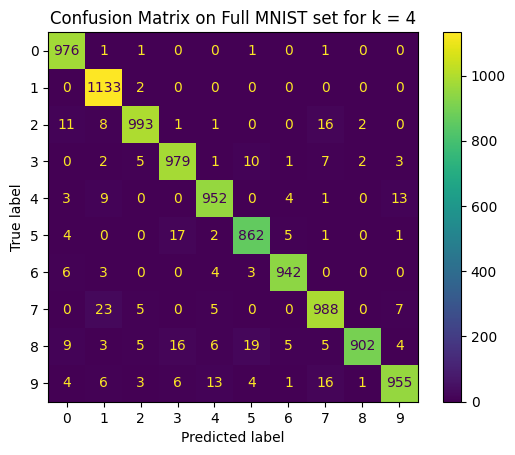

In [27]:
cm = confusion_matrix(y_test2, y_pred2)
ConfusionMatrixDisplay(cm).plot(cmap='viridis')

plt.title("Confusion Matrix on Full MNIST set for k = 4")
plt.show()

In [28]:
k_values = np.logspace(0, np.log(len(X_train2)), 25, base=np.e).astype(int)
k_values = np.unique(k_values[:-1])

accuracy = np.array([])
for k in k_values:
    model2 = KNeighborsClassifier(n_neighbors=k)
    model2.fit(X_train2, y_train2)
    print("k = ", k, " fit")
    y_pred2 = model.predict(X_test2)
    thisacc = accuracy_score(y_test2, y_pred2)
    accuracy = np.append(accuracy, thisacc)
    print(f"k = {k}, accuracy = {accuracy[-1]}")
print(accuracy)

k =  1  fit
k = 1, accuracy = 0.9682
k =  2  fit
k = 2, accuracy = 0.9682
k =  3  fit
k = 3, accuracy = 0.9682
k =  6  fit
k = 6, accuracy = 0.9682
k =  9  fit
k = 9, accuracy = 0.9682
k =  15  fit
k = 15, accuracy = 0.9682
k =  24  fit
k = 24, accuracy = 0.9682
k =  39  fit
k = 39, accuracy = 0.9682
k =  61  fit
k = 61, accuracy = 0.9682
k =  97  fit
k = 97, accuracy = 0.9682
k =  154  fit
k = 154, accuracy = 0.9682
k =  244  fit
k = 244, accuracy = 0.9682
k =  387  fit
k = 387, accuracy = 0.9682
k =  612  fit
k = 612, accuracy = 0.9682
k =  969  fit
k = 969, accuracy = 0.9682
k =  1532  fit
k = 1532, accuracy = 0.9682
k =  2423  fit
k = 2423, accuracy = 0.9682
k =  3833  fit
k = 3833, accuracy = 0.9682
k =  6063  fit
k = 6063, accuracy = 0.9682
k =  9589  fit
k = 9589, accuracy = 0.9682
k =  15166  fit
k = 15166, accuracy = 0.9682
k =  23986  fit
k = 23986, accuracy = 0.9682
k =  37936  fit
k = 37936, accuracy = 0.9682
[0.9682 0.9682 0.9682 0.9682 0.9682 0.9682 0.9682 0.9682 0.9682 0

[    1     2     3     6     9    15    24    39    61    97   154   244
   387   612   969  1532  2423  3833  6063  9589 15166 23986 37936]


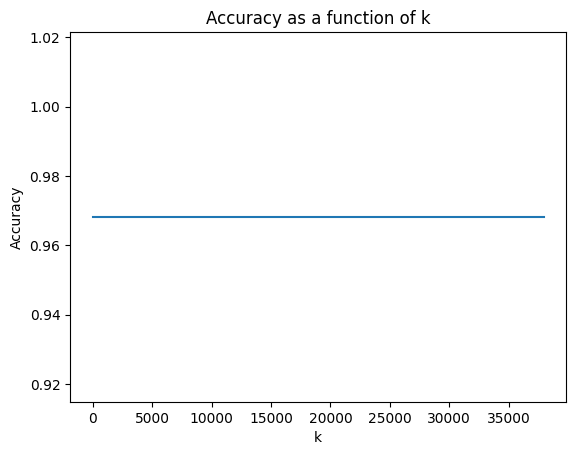

In [ ]:
plt.title("Accuracy as a function of k")
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.plot(k_values, accuracy)
plt.show()

It looks like all of the k values perform the same because the test-train split was the same every time. I'll leave it as the best k being 4 because it performed well on the smaller dataset. Overall, KNN performed remarkably well for the dataset, having around a 97% percent accuracy (my guess was that the accuracy would be around 85%).